In [13]:
# Processes optimized portfolio weights and retrieves relevant stock data
import numpy as np
import pandas as pd
import os

# Load the optimized portfolio data
optimised_portfolio_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\optimised_weights.csv"
optimised_portfolio_df = pd.read_csv(optimised_portfolio_file_path)
optimised_stock_code = optimised_portfolio_df['stock code'].astype(str).tolist()
# print(optimised_stock_code)
optimised_weights = np.array(optimised_portfolio_df['weights'].tolist())
# print(optimised_weights)

# Define the path to the directory containing monthly stock information
monthly_stock_info_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data"
# Storing the matched file path 
matched_files_paths = []

for file in os.listdir(monthly_stock_info_file_path):
    # Extract the stock code from file name
    stock_code = file.split('_')[0]
    # print(stock_code)
    
    # Check if the stock code in the list
    if stock_code in optimised_stock_code:
        full_path = os.path.join(monthly_stock_info_file_path, file)
        matched_files_paths.append(full_path)
        
#  print(matched_files_paths)

# Initialised an empty DataFrame to store all the data 
conbined_df = pd.DataFrame()

for file_path in matched_files_paths:
    # Read current file data
    current_df = pd.read_csv(file_path)
    
    current_df['日期'] = pd.to_datetime(current_df['日期'], format='%Y%m')
    
    # Add current data into final DataFrame
    conbined_df = pd.concat([conbined_df, current_df], ignore_index=True)

# Sort the combined dataframe by date    
conbined_df.sort_values(by='日期', inplace=True)
# print(conbined_df)

save_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Combined_Stock_Info.csv"
conbined_df.to_csv(save_path, index=False)
print("Combined_Stock_Info.csv saved.")

Combined_Stock_Info.csv saved.


Average Annualized Return: 0.08880185164158653
Standard Deviation: 0.19624202591936496
Pic is saved.


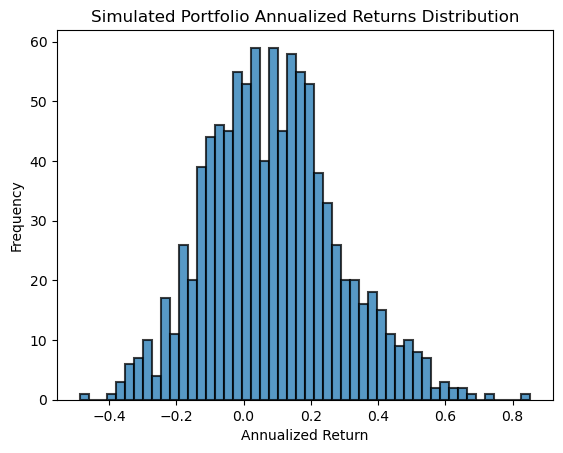

In [14]:
# Simulates the annualized return distribution for an optimized portfolio using Monte Carlo simulations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined stock information from a specified path
stock_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Combined_Stock_Info.csv"
stock_df =pd.read_csv(stock_file_path)

# Convert the optimized portfolio weights into a dictionary for easy access
weights_dict = optimised_portfolio_df.set_index('stock code')['weights'].to_dict()
# print(weights)

# Filter the dataframe to include only those stocks present in the optimized portfolio
stock_df = stock_df[stock_df['股票代碼'].isin(weights_dict.keys())]
# print(stock_df)

# Pivot the dataframe to create a matrix of expected returns with dates as rows and stock codes as columns
pivot_returns = stock_df.pivot(index='日期', columns='股票代碼', values='預期回報')
# print(pivot_returns)

# Apply the portfolio weights to the expected returns of each stock
weighted_returns = pivot_returns.apply(lambda x: x * weights_dict[x.name] if x.name in weights_dict else 0)
# print(weighted_returns)

# Sum the weighted returns across all stocks to get the portfolio's total expected monthly returns
portfolio_monthly_returns = weighted_returns.sum(axis=1)
# print(portfolio_monthly_returns)

# Number of simulations to run
n_simulations = 1000
simulated_annual_returns = []
for _ in range(n_simulations):
    # Randomly sample 12 monthly returns to simulate a year's performance
    sampled = portfolio_monthly_returns.sample(n=12, replace=True)  
    # Calculate the compounded annual return from the sampled monthly returns
    annual_return = (sampled + 1).prod() - 1
    simulated_annual_returns.append(annual_return)

# Convert the list of simulated returns to a numpy array for statistical analysis
simulated_annual_returns = np.array(simulated_annual_returns)
# print(simulated_annual_returns)

# Calculate the mean and standard deviation of the simulated annual returns
mean_return = simulated_annual_returns.mean()
std_dev = simulated_annual_returns.std()

print(f"Average Annualized Return: {mean_return}")
print(f"Standard Deviation: {std_dev}")

# Visualize the distribution of simulated annualized returns
plt.hist(simulated_annual_returns, bins=50, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xlabel('Annualized Return')
plt.ylabel('Frequency')
plt.title('Simulated Portfolio Annualized Returns Distribution')

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\Simulated_Portfolio_Annualized_Returns_Distribution.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()

In [15]:
# Processes and combines stock data for the top 20 optimized portfolio stocks.
import numpy as np
import pandas as pd
import os

# Path to the CSV file containing the top 20 optimized portfolio weights
top_20_optimised_portfolio_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\top_20_optimised_weights.csv"
top_20_optimised_portfolio_df = pd.read_csv(top_20_optimised_portfolio_file_path)
top_20_optimised_stock_code = top_20_optimised_portfolio_df['stock code'].astype(str).tolist()
# print(top_20_optimised_stock_code)
top_20_optimised_weights = np.array(top_20_optimised_portfolio_df['weights'].tolist())
# print(top_20_optimised_weights)

# Directory containing monthly stock information files
monthly_stock_info_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data"
# Stroing the matched file path 
top_20_matched_files_paths = []

for file in os.listdir(monthly_stock_info_file_path):
    # Extract the stock code from file name
    stock_code = file.split('_')[0]
    # print(stock_code)
    
    # Check if the stock code in the list
    if stock_code in top_20_optimised_stock_code:
        top_20_full_path = os.path.join(monthly_stock_info_file_path, file)
        top_20_matched_files_paths.append(top_20_full_path)
        
#  print(top_20_matched_files_paths)

# Initialised an empty DataFrame to store all the data 
top_20_conbined_df = pd.DataFrame()

for file_path in top_20_matched_files_paths:
    # Read current file data
    current_df = pd.read_csv(file_path)
    
    current_df['日期'] = pd.to_datetime(current_df['日期'], format='%Y%m')
    
    # Add current data into final DataFrame
    top_20_conbined_df = pd.concat([top_20_conbined_df, current_df], ignore_index=True)

# Sort the combined DataFrame by date to organize the data chronologically    
top_20_conbined_df.sort_values(by='日期', inplace=True)
# print(top_20_conbined_df)

save_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Top_20_Combined_Stock_Info.csv"
top_20_conbined_df.to_csv(save_path, index=False)
print("Top_20_Combined_Stock_Info.csv saved.")


Top_20_Combined_Stock_Info.csv saved.


Average Annualized Return: 0.08579909987687409
Standard Deviation: 0.1403592613581229
Pic is saved.


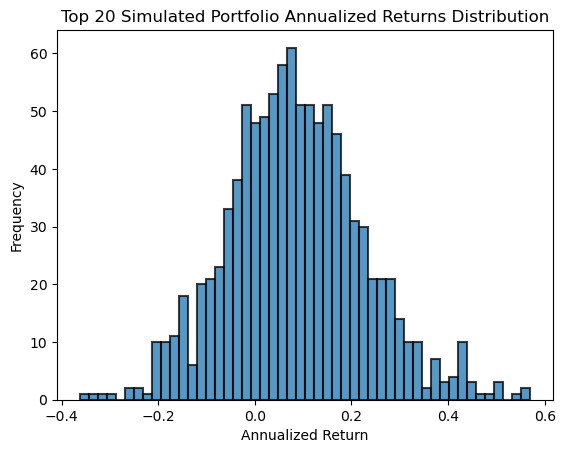

In [17]:
# Simulates the annualized return distribution for the top 20 optimized portfolio stocks.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the combined stock information file for the top 20 stocks
top_20_stock_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Data_Collection\Status_of_TWSE\per_stock_data\Top_20_Combined_Stock_Info.csv"
top_20_stock_df =pd.read_csv(top_20_stock_file_path)
top_20_weights_dict = top_20_optimised_portfolio_df.set_index('stock code')['weights'].to_dict()
# print(weights)

# Filter the stock DataFrame to include only the stocks present in the optimized portfolio
top_20_stock_df = stock_df[stock_df['股票代碼'].isin(top_20_weights_dict.keys())]
# print(stock_df)

# Pivot the filtered DataFrame to have dates as index and stock codes as columns, with expected returns as values
top_20_pivot_returns = top_20_stock_df.pivot(index='日期', columns='股票代碼', values='預期回報')
# print(pivot_returns)

# Apply the weights to the expected returns to calculate the weighted returns for each stock
top_20_weighted_returns = top_20_pivot_returns.apply(lambda x: x * top_20_weights_dict[x.name] if x.name in top_20_weights_dict else 0)
# print(weighted_returns)

# Sum the portfolio's monthly returns by summing the weighted returns across all stocks for each month
top_20_portfolio_monthly_returns = top_20_weighted_returns.sum(axis=1)
# print(portfolio_monthly_returns)

# Number of simulations to run
n_simulations = 1000
top_20_simulated_annual_returns = []
for _ in range(n_simulations):
    # Randomly sample 12 monthly returns to simulate a year's performance
    sampled = top_20_portfolio_monthly_returns.sample(n=12, replace=True)  # assume 12 months in a year
    # Calculate the compounded annual return from the sampled monthly returns
    annual_return = (sampled + 1).prod() - 1
    top_20_simulated_annual_returns.append(annual_return)

# Convert the list of simulated returns to a numpy array for statistical analysis
top_20_simulated_annual_returns = np.array(top_20_simulated_annual_returns)
# print(simulated_annual_returns)

# Calculate the mean and standard deviation of the simulated annual returns
top_20_mean_return = top_20_simulated_annual_returns.mean()
top_20_std_dev = top_20_simulated_annual_returns.std()

print(f"Average Annualized Return: {top_20_mean_return}")
print(f"Standard Deviation: {top_20_std_dev}")

# Visualize the distribution of simulated annualized returns
plt.hist(top_20_simulated_annual_returns, bins=50, alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xlabel('Annualized Return')
plt.ylabel('Frequency')
plt.title('Top 20 Simulated Portfolio Annualized Returns Distribution')

save_file_path = r"C:\Users\Sydney\Desktop\KCL\Undergraduate\Year3\Final Individual Project\Results\Top_20_Simulated_Portfolio_Annualized_Returns_Distribution.png"
plt.savefig(save_file_path, bbox_inches='tight', dpi=300)
print("Pic is saved.")

plt.show()